# Obesity Detection

## About Data

This dataset contains information about the obesity classification of individuals. The data was collected from a variety of sources, including medical records, surveys, and self-reported data. The goal is to analyze and classify individuals into different obesity categories using the provided data.

## Source

This data is available in Kaggele in the following link:
> https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset/data


## Data Dictionary

* **ID**: A unique identifier for each individual. It contains numeric data.
* **Age**: The age of the individual. It contains numeric data.
* **Gender**: The gender of the individual. It contains categotical binary data.(Male, Female)
* **Height**: The height of the individual in centimeters(cm). It contains numeric data.
* **Weight**: The weight of the individual in kilograms(KG.). It contains numeric data.
* **BMI**: The body mass index of the individual, calculated as weight divided by height squared. It contains numeric data.
* **Label**: The obesity classification of the individual. This is the target variable. (Normal Weight, Overweight, Obese, Underweight)

## Problem Statement

1. **Exploratory Data Analysis(EDA)**: The objective of EDA is to analyze the dataset and uncover the patterns & relationships that might influence to detect the obesity in a person.
2. **Preprocessing and Cleaning**: Clean the data by handling or removing the missing values, outliers, duplicate rows and unnecessary features.

### Load Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

import ppscore as pps
from sklearn.preprocessing import IsolationForest

### Settings

In [6]:
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
data_path="../data"
file_path = os.path.join(data_path, "Obesity Classification.csv")

### Load Dataset

In [42]:
# Load Data
df = pd.read_csv(file_path)

### General Information About Data

In [43]:
# List 1st 5 rows to get an idea about the data in the columns
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [44]:
# Get  Data Description
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

DATA DESCRIPTION
Number of observations: 108
Number of features: 7


In [45]:
# Get description of features
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)
print("-" * 60)
# Separate numerical and categorical features
num_cols = [col for col in df.columns if df[col].dtype != "object"]
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
print(f"Number of Numerical Features: {len(num_cols)}")
print(num_cols)
print("-" * 60)
print(f"Number of Categorical Features: {len(cat_cols)}")
print(cat_cols)

FEATURE DESCRIPTION
ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object
------------------------------------------------------------
Number of Numerical Features: 5
['ID', 'Age', 'Height', 'Weight', 'BMI']
------------------------------------------------------------
Number of Categorical Features: 2
['Gender', 'Label']


In [46]:
# Find duplicate rows
print("=" * 60)
print("DUPLICATE ROW DETECTION")
print("=" * 60)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

DUPLICATE ROW DETECTION
Number of duplicate rows: 0


In [47]:
# Missing or Null value detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("No missing value present")

MISSING VALUE DETECTION
No missing value present


In [48]:
# Detect features containing unique values
print("=" * 60)
print("UNIQUE FEATURE DETECTION")
print("=" * 60)
for col in df.columns:
    if len(df[col].unique()) == df.shape[0]:
        print(f"{col} contains all unique values")

UNIQUE FEATURE DETECTION
ID contains all unique values


### Key Findings

* This dataset contains **108** observations.
* This dataset contains **6** Input and **1** target features.
* Number of Numerical Features **5**.
* Number of Categorical Features **2**.
* No duplicate row present
* No missing or null value present in any feature.
* As **ID** feature contains all unique values so it unnecessary for the model.

### Univariate Analysis

In [49]:
# Find Statistical Summary for Numerical Features
# This summary will give us a rough idea about the distribution of values
print("=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
for col in num_cols:
    print(f"Feature: {col}")
    print(f"mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Standard Deviation: {df[col].std()}")
    print(f"Range: {df[col].min()} - {df[col].max()}")
    print("-" * 60)

STATISTICAL SUMMARY
Feature: ID
mean: 56.0462962962963
Median: 56.5
Standard Deviation: 31.917939250012097
Range: 1 - 110
------------------------------------------------------------
Feature: Age
mean: 46.55555555555556
Median: 42.5
Standard Deviation: 24.720619617394565
Range: 11 - 112
------------------------------------------------------------
Feature: Height
mean: 166.57407407407408
Median: 175.0
Standard Deviation: 27.873614530324478
Range: 120 - 210
------------------------------------------------------------
Feature: Weight
mean: 59.49074074074074
Median: 55.0
Standard Deviation: 28.856232540917752
Range: 10 - 120
------------------------------------------------------------
Feature: BMI
mean: 20.54907407407407
Median: 21.2
Standard Deviation: 7.5838181808419725
Range: 3.9 - 37.2
------------------------------------------------------------


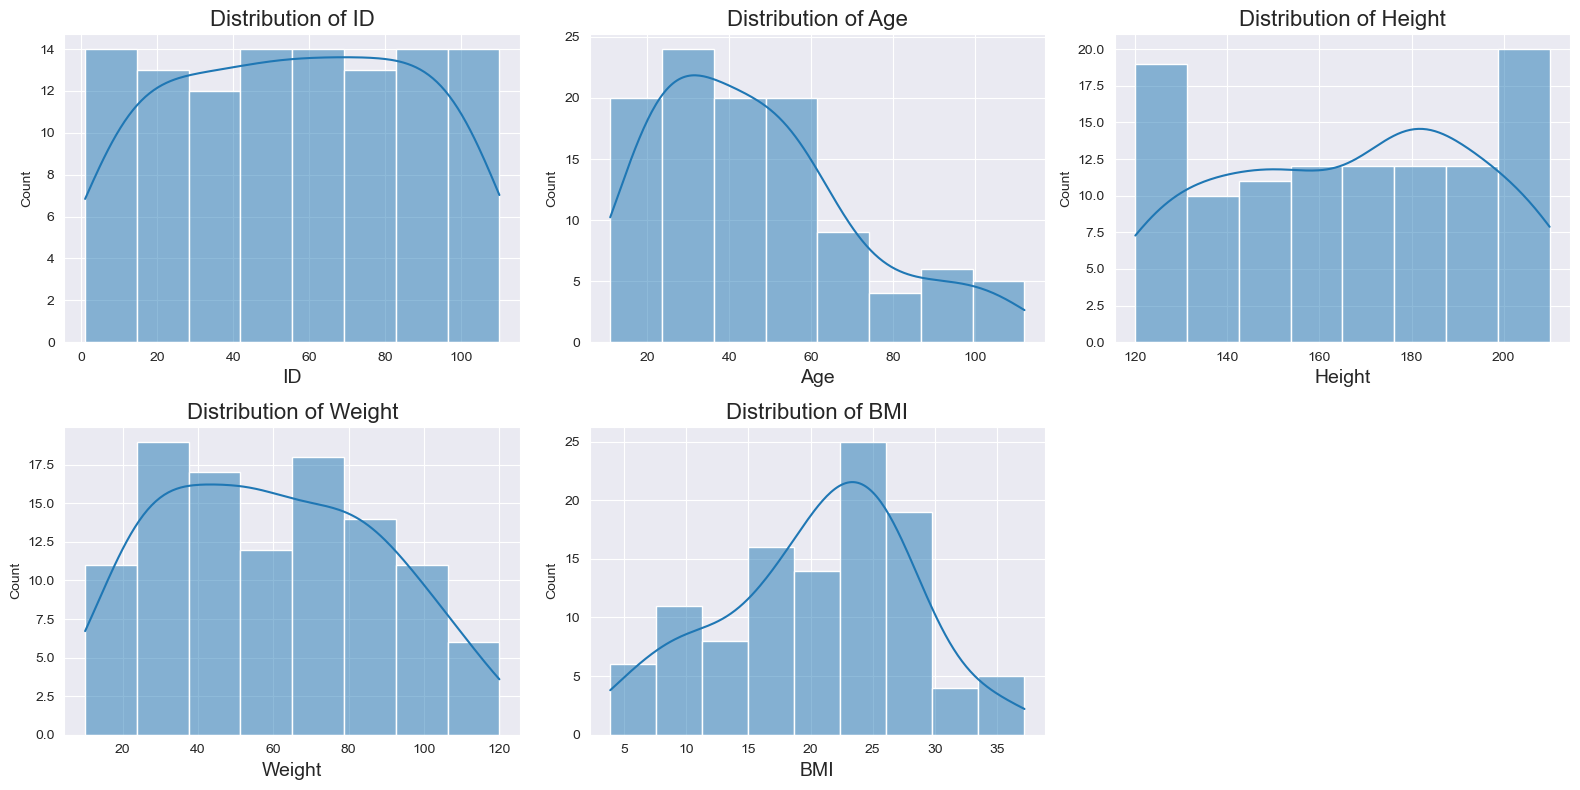

In [50]:
# Find Distribution of each numerical feature using Histogram Analysis
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(data= df, x= col, kde= True, ax= axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize= 16)
    axes[i].set_xlabel(f"{col}", fontsize=14)
plt.tight_layout()
axes[-1].axis("off")
plt.show()

### Key Findings

* **None** of the numerical feature is normally distributed.
* **Age** is slightly reght skewed above 60 years. Most  of the observations present below **60 years**.
* **Weight** is almost uniformly distributed.
* **Height** is almost uniformly distributed. Few more observations present for **120-130cm** and **200-210cm**.

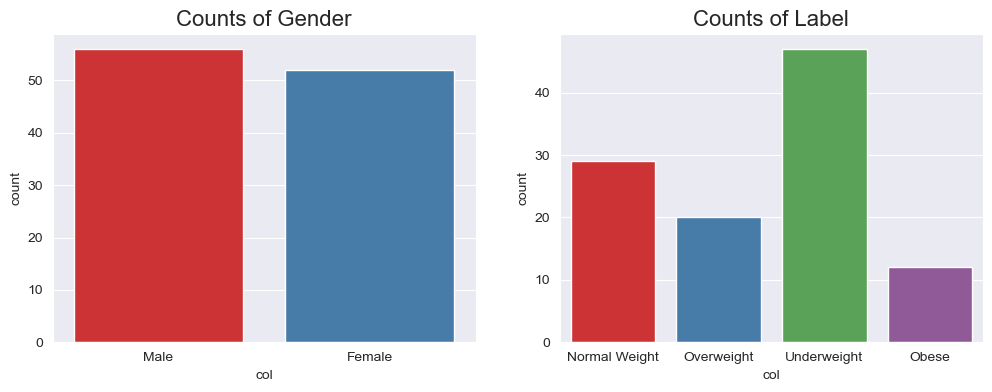

In [51]:
# Find Counts of each categorical feature using Count Plot Analysis
fig, axes = plt.subplots(nrows = 1, ncols= 2, figsize=(12, 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x = col, hue=col, palette= "Set1", ax= axes[i])
    axes[i].set_title(f"Counts of {col}", fontsize= 16)
    axes[i].set_xlabel(f"col")
plt.show()

### key Findings

* From Count plot analysis of **Gender** it is found that ratio of male and female observations are almost same. Number of **male** observations are slightly higher.
* From Count plot analysis of **Label** it is found that most of the observations are present for **Underweight** and **Normal Weight**. So this dataset in **Imbalanced**.

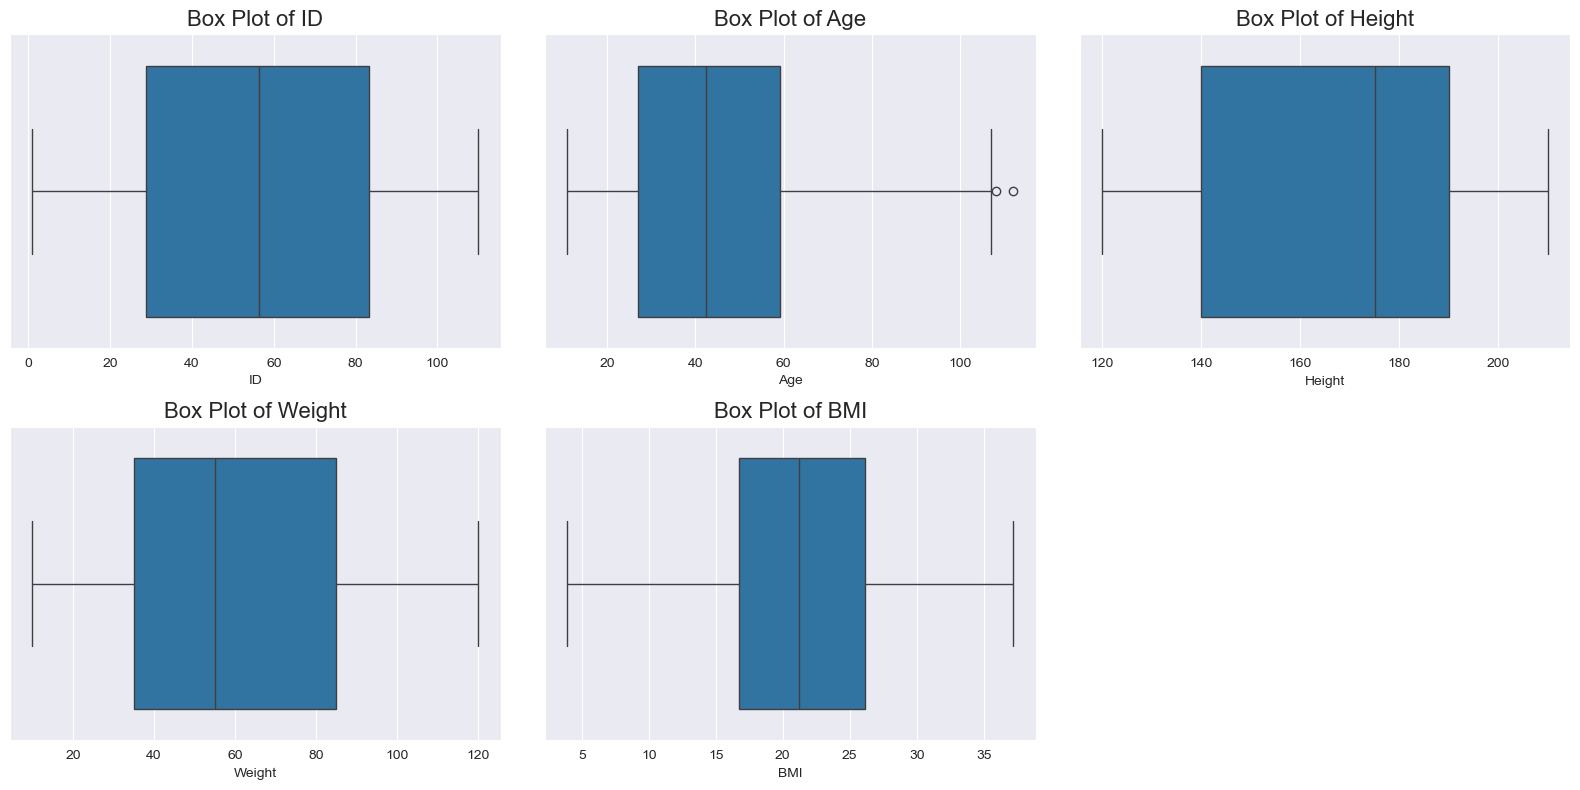

In [52]:
# Detect outliers in numerical features using box plot analysis
fig, axes = plt.subplots(nrows= 2, ncols= 3, figsize= (16, 8))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(data= df, x= col, ax= axes[i])
    axes[i].set_title(f"Box Plot of {col}", fontsize= 16)
    
plt.tight_layout()
axes[-1].axis("off")
plt.show()

## Correlation Anlysis

In [53]:
# Encode the target using mapping
df_corr = df.copy()
df_corr["Label_Encoded"] = df_corr["Label"].replace({"Underweight": 0, "Normal Weight": 1, "Overweight": 2, "Obese": 3})
# Add the target to numerical feature list
cols_corr = num_cols + list(["Label_Encoded"])
# Find linear correlation among the numerical features and target with Pearson's Correlation Co-efficient
corr = df_corr[cols_corr].corr().round(2)
corr

,ID,Age,Height,Weight,BMI,Label_Encoded
ID,1.00,-0.30,-0.01,-0.57,-0.62,-0.46
Age,-0.30,1.00,-0.08,0.47,0.47,0.45
Height,-0.01,-0.08,1.00,0.43,0.35,0.43
Weight,-0.57,0.47,0.43,1.00,0.97,0.94
BMI,-0.62,0.47,0.35,0.97,1.00,0.87
Label_Encoded,-0.46,0.45,0.43,0.94,0.87,1.00


### Key Findings

* **Weight** and **BMI** are highly correlated with target.
* **Weight** and **BMI** are highly correlated with each other.
* **Age** and **Height** have modarate positive correlation with target.
* **Age** has modarate positive correlation with **Weight** and **BMI**.

### Data Preprocessing and Cleaning

In [54]:
# Remove Unnecessary Features
# Here ID is the unnecessary feature present in the dataset as it contains all unique values which is not
# acceptable for any machine learning model. So it needs to be removed.

df_col_dropped = df.drop("ID", axis= 1)

In [55]:
# Sanity Check
df_col_dropped.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese


In [57]:
# Save the Cleaned data
file_path = os.path.join(data_path, "obesity_classification_cleaned.csv")
df_col_dropped.to_csv(file_path, index= False)